# Importing Dataset

In [1]:
import pandas as pd
df1=pd.read_csv("C:/Users/HP/Downloads/loan_status_project/credit/credit_train.csv")

In [2]:
# Calculate debt-to-income ratio
df1['Debt_to_Income'] = df1['Monthly Debt'] / df1['Annual Income']
# Calculate loan-to-income ratio
df1['Loan_to_Income'] = df1['Current Loan Amount'] / df1['Annual Income']

# Null value Treatment

In [3]:
df1.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
Debt_to_Income                  19668
Loan_to_Income                  19668
dtype: int64

<Axes: >

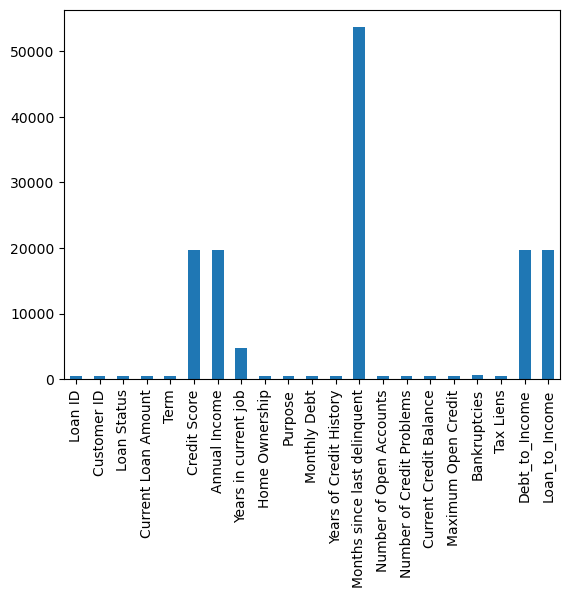

In [4]:
#missing values by visualising
df1.isna().sum().plot(kind='bar')

In [5]:
for i in df1.columns:
    if df1[i].dtypes==object:
        df1[i]=df1[i].fillna(df1[i].mode()[0])   #categorical columns filled by mode
    else:
        df1[i]=df1[i].fillna(df1[i].mean())      #numerical columns filled by mean

# Input and Output Features

In [6]:
# Select input features (X) and output feature (y)
X=df1.drop(labels=['Loan Status','Bankruptcies','Years in current job','Purpose','Tax Liens'],axis=1)
Y=df1[['Loan Status']]

In [7]:
# Map categorical output feature to numeric values
# Replace {'category1': 0, 'category2': 1, ...} with your desired mapping
Y=Y.replace(['Fully Paid','Charged Off'],[1,2])

# Seperate Categorical and Continous columns of Input Features

In [8]:
cat=[]
con=[]
for i in X.columns:
    if X[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)
print('Cat columns: ',cat)
print('Con columns: ',con)

Cat columns:  ['Loan ID', 'Customer ID', 'Term', 'Home Ownership']
Con columns:  ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Debt_to_Income', 'Loan_to_Income']


In [9]:
Xcat=X[cat]
Xcon=X[con]

# Outliers Treatment

In [10]:
# Standardize numerical columns
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xcon=pd.DataFrame(ss.fit_transform(Xcon),columns=con)
# Display the standardized DataFrame
Xcon

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Debt_to_Income,Loan_to_Income
0,-0.356914,-0.277703,-0.217347,-1.091727e+00,-1.427889e-01,-4.730770e-16,-1.026318,1.727409e+00,-0.177096,-0.041140,-1.654196e+00,-3.808518e-01
1,-0.362689,0.000000,0.000000,1.220673e+00,4.145666e-01,-1.791081e+00,4.777142,-3.495776e-01,-0.172336,0.010760,-2.899380e-16,-5.140440e-17
2,2.783370,-0.253520,0.880194,8.834262e-01,-4.714858e-01,-3.929080e-01,1.375114,1.727409e+00,0.008951,-0.001280,-2.140201e-01,9.046808e-01
3,-0.359997,-0.268634,-0.589117,-8.012766e-01,-8.859297e-01,-4.730770e-16,-0.425960,-3.495776e-01,-0.102100,-0.044702,-5.900859e-01,-3.794244e-01
4,-0.365405,0.000000,0.000000,1.784692e-01,-1.729109e+00,-4.730770e-16,0.774756,-3.495776e-01,-0.109746,-0.039893,-2.899380e-16,-5.140440e-17
...,...,...,...,...,...,...,...,...,...,...,...,...
100509,0.000000,0.000000,0.000000,2.995759e-16,5.077243e-16,-4.730770e-16,0.000000,-5.764796e-17,0.000000,0.000000,-2.899380e-16,-5.140440e-17
100510,0.000000,0.000000,0.000000,2.995759e-16,5.077243e-16,-4.730770e-16,0.000000,-5.764796e-17,0.000000,0.000000,-2.899380e-16,-5.140440e-17
100511,0.000000,0.000000,0.000000,2.995759e-16,5.077243e-16,-4.730770e-16,0.000000,-5.764796e-17,0.000000,0.000000,-2.899380e-16,-5.140440e-17
100512,0.000000,0.000000,0.000000,2.995759e-16,5.077243e-16,-4.730770e-16,0.000000,-5.764796e-17,0.000000,0.000000,-2.899380e-16,-5.140440e-17


In [11]:
# Define a threshold for detecting outliers
out=[]
for i in Xcon.columns:
    ol=Xcon[(Xcon[i]>3)|(Xcon[i]<-3)].index
    out.extend(ol)

In [12]:
print(out)

[5, 43, 51, 56, 65, 97, 117, 160, 165, 200, 216, 221, 276, 303, 307, 365, 383, 385, 389, 406, 410, 449, 509, 535, 558, 602, 609, 663, 673, 679, 693, 695, 732, 749, 776, 786, 788, 792, 802, 814, 824, 825, 842, 892, 902, 930, 996, 1051, 1094, 1127, 1146, 1165, 1180, 1187, 1189, 1298, 1373, 1375, 1410, 1422, 1428, 1496, 1507, 1515, 1525, 1538, 1548, 1554, 1619, 1621, 1637, 1643, 1656, 1658, 1666, 1682, 1692, 1708, 1723, 1728, 1744, 1754, 1807, 1870, 1874, 1886, 1900, 1905, 1916, 1930, 1935, 1944, 1950, 1965, 2004, 2046, 2064, 2065, 2070, 2095, 2103, 2150, 2161, 2177, 2183, 2192, 2197, 2236, 2241, 2270, 2277, 2292, 2303, 2341, 2363, 2428, 2434, 2478, 2486, 2517, 2523, 2555, 2559, 2573, 2600, 2624, 2646, 2659, 2664, 2674, 2679, 2688, 2697, 2711, 2732, 2751, 2757, 2773, 2792, 2835, 2847, 2849, 2885, 2903, 2920, 2931, 3008, 3022, 3061, 3066, 3103, 3125, 3151, 3200, 3205, 3213, 3223, 3230, 3233, 3283, 3287, 3303, 3306, 3315, 3354, 3400, 3430, 3442, 3454, 3508, 3524, 3533, 3567, 3637, 3681, 370

In [13]:
outliers=list(set(out))
print(outliers)

[32768, 1, 32770, 98306, 5, 98311, 32776, 10, 98315, 65547, 12, 65553, 32787, 98325, 29, 65566, 32801, 65570, 98337, 32804, 98341, 98342, 36, 32802, 32809, 65577, 43, 98347, 98343, 46, 98352, 51, 98355, 98356, 54, 65591, 56, 65593, 32820, 32819, 32829, 63, 65, 65603, 98371, 32838, 65610, 74, 76, 65612, 65614, 65618, 98388, 87, 98393, 32858, 65625, 98396, 32860, 96, 97, 32866, 32867, 103, 32871, 65644, 98413, 98414, 32879, 65648, 98416, 32882, 117, 65654, 118, 32888, 65663, 65664, 130, 32900, 65669, 98439, 65673, 32906, 98442, 65677, 32912, 98451, 98452, 32917, 151, 32919, 32920, 98462, 32927, 160, 161, 98465, 165, 98470, 169, 32945, 179, 32948, 180, 98486, 98491, 98496, 32961, 200, 65742, 98511, 65747, 216, 32984, 65753, 98522, 65756, 221, 32989, 32994, 98533, 32998, 229, 33000, 233, 65771, 33004, 241, 65778, 98546, 98548, 33009, 65781, 248, 33018, 33020, 98558, 98559, 257, 98562, 98564, 33031, 65803, 65804, 268, 269, 98575, 33043, 276, 98580, 98585, 98586, 98587, 98588, 33053, 285, 65

In [14]:
# Remove outliers from DataFrame
X=X.drop(index=outliers,axis=0)
Y=Y.drop(index=outliers,axis=0)

In [15]:
X.shape

(86147, 16)

In [16]:
Y.shape

(86147, 1)

In [17]:
# Set the index of DataFrame X and Y to a new range of values
X.index=range(0,86147)
Y.index=range(0,86147)

In [18]:
Xcat=X[cat]
Xcon=X[con]

In [19]:
# Re-standardize numerical columns after removing outliers
Xcon=pd.DataFrame(ss.fit_transform(Xcon),columns=con)

# Preprocessing

In [20]:
# Apply Label Encoder to the discretized numerical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in Xcat.columns:
    Xcat[i]=le.fit_transform(Xcat[i])

C:\Users\HP\AppData\Local\Temp\ipykernel_18464\3043695546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\HP\AppData\Local\Temp\ipykernel_18464\3043695546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\HP\AppData\Local\Temp\ipykernel_18464\3043695546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [21]:
Y.value_counts()

Loan Status
1              69392
2              16755
Name: count, dtype: int64

In [22]:
# Join numerical and categorical columns
X=Xcon.join(Xcat)

In [23]:
X

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Debt_to_Income,Loan_to_Income,Loan ID,Customer ID,Term,Home Ownership
0,-0.315973,-0.563719,-0.290822,-1.226594,-0.092386,0.027494,-1.071880,2.658162,-0.173698,-0.294502,-1.681428,-0.428621,5689,41602,1,1
1,3.139518,-0.349660,1.601597,1.133709,-0.453248,-0.382892,1.567452,2.658162,0.151932,0.245748,-0.197958,1.593255,21745,26051,1,2
2,-0.319366,-0.483447,-0.931841,-0.879506,-0.908247,0.027494,-0.412047,-0.379098,-0.042436,-0.342780,-0.585329,-0.426376,32774,63278,0,2
3,-0.325317,1.894318,0.083935,0.291287,-1.833936,0.027494,0.907619,-0.379098,-0.055819,-0.277602,0.022496,0.170380,58097,35380,1,3
4,-0.323879,-0.423243,-0.261129,-0.671561,0.284165,-1.704178,0.467730,2.658162,-0.668259,-0.529008,-0.872261,-0.437620,10779,39490,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86142,0.076766,1.894318,0.083935,0.078017,0.064376,0.027494,0.056111,0.132103,0.136265,0.263103,0.022496,0.170380,7,7,1,1
86143,0.076766,1.894318,0.083935,0.078017,0.064376,0.027494,0.056111,0.132103,0.136265,0.263103,0.022496,0.170380,7,7,1,1
86144,0.076766,1.894318,0.083935,0.078017,0.064376,0.027494,0.056111,0.132103,0.136265,0.263103,0.022496,0.170380,7,7,1,1
86145,0.076766,1.894318,0.083935,0.078017,0.064376,0.027494,0.056111,0.132103,0.136265,0.263103,0.022496,0.170380,7,7,1,1


In [24]:
print(X.shape)
print(Y.shape)

(86147, 16)
(86147, 1)


# Splitting the data into training and testing

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=86)

# Balancing the unbalanced output feature using RandomOverSampler

In [26]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler
# Apply RandomOverSampler
ros = RandomOverSampler(random_state=86)
# Resample the data to balance the output feature
xtrain_resampled, ytrain_resampled = ros.fit_resample(xtrain,ytrain)
unique, counts = np.unique(ytrain_resampled, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution after RandomOverSampler:")
print(class_distribution)

Class Distribution after RandomOverSampler:
{1: 55540, 2: 55540}


# Import Libraries

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Model Building

In [52]:
# Define models
lr = LogisticRegression()
dtc = DecisionTreeClassifier(random_state=86, criterion='entropy')
rfc = RandomForestClassifier(n_estimators=8, random_state=86, criterion='entropy')
knc = KNeighborsClassifier(n_neighbors=2)

In [53]:
# Fit models
lr.fit(xtrain_resampled, ytrain_resampled)
dtc.fit(xtrain_resampled, ytrain_resampled)
rfc.fit(xtrain_resampled, ytrain_resampled)
knc.fit(xtrain_resampled, ytrain_resampled)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

KNeighborsClassifier(n_neighbors=2)

In [56]:
# Evaluate models
models = [lr, dtc, rfc, knc]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Random Forest with GridSearchCV']

In [57]:
# Loop through each model and evaluate its performance on the test set
for i, model in enumerate(models):
# Make predictions on the test set
    y_pred = model.predict(xtest)
# Calculate precision, recall, and F1 score
    precision = precision_score(ytest, y_pred, average='binary')
    recall = recall_score(ytest, y_pred, average='binary')
    f1 = f1_score(ytest, y_pred, average='binary')
    print(f"{model_names[i]}:")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}")

Logistic Regression:
  Precision: 0.8793183940242764
  Recall: 0.5423265188597755
  F1 Score: 0.6708815672306322
Decision Tree:
  Precision: 0.9653170906485131
  Recall: 0.9696947883674057
  F1 Score: 0.9675009875390527
Random Forest:
  Precision: 0.9596497373029772
  Recall: 0.9861071120069105
  F1 Score: 0.9726985479461782
K-Nearest Neighbors:
  Precision: 0.9584988649262202
  Recall: 0.9725741433918802
  F1 Score: 0.9654852079462627


In [64]:
# Define parameter grid for GridSearchCV
tuning_parameters = {'n_estimators': np.arange(7, 15), 'random_state': [64, 84, 96]}

In [65]:
# Initialize GridSearchCV with the model, parameter grid, and evaluation metric
gscv = GridSearchCV(RandomForestClassifier(), cv=3, param_grid=tuning_parameters)
# Perform grid search on the training data
gscv.fit(xtrain_resampled, ytrain_resampled)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 7,  8,  9, 10, 11, 12, 13, 14]),
                         'random_state': [64, 84, 96]})

In [67]:
# Get the best parameters and the corresponding score
cvmodel = gscv.fit(X, Y)
cvmodel.best_params_

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array

{'n_estimators': 14, 'random_state': 96}

In [68]:
# criterion: The function to measure the quality of a split ('entropy' in this case)
model=RandomForestClassifier(n_estimators=14, random_state=96, criterion='entropy')

In [69]:
# Train the RandomForestClassifier model on the resampled training data
model.fit(xtrain_resampled,ytrain_resampled)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=14, random_state=96)

# Final Model Evaluation

In [120]:
from sklearn.metrics import mean_absolute_error
# Make predictions on the training and testing data
ts_pred=model.predict(xtest)
tr_pred=model.predict(xtrain)
# Calculate mean absolute error for training and testing predictions
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
# Print mean absolute error for training and testing predictions
print(tr_err)
print(ts_err)
# Calculate F1 score for training and testing predictions
tr_score=f1_score(tr_pred,ytrain)
ts_score=f1_score(ts_pred,ytest)
print('S_tr=',tr_score)
print('S_ts=',ts_score)

0.04373376670487688
0.04056877539175856
S_tr= 0.9732474126147237
S_ts= 0.975238230188813


In [121]:
# Load the test data from CSV file into a DataFrame
df2=pd.read_csv("C:/Users/HP/Downloads/loan_status_project/credit/credit_test.csv")

In [122]:
# Calculate Debt-to-Income ratio for test data
df2['Debt_to_Income'] = df2['Monthly Debt'] / df2['Annual Income']
# Calculate Loan-to-Income ratio for test data
df2['Loan_to_Income'] = df2['Current Loan Amount'] / df2['Annual Income']

In [123]:
# Drop specified columns from the DataFrame
df2.drop(labels=['Bankruptcies','Years in current job','Purpose','Tax Liens'],axis=1) 

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Debt_to_Income,Loan_to_Income
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,Home Mortgage,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.020250,0.294735
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,Home Mortgage,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.019083,0.138945
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,Rent,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.009633,0.176205
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,Rent,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,0.021500,0.225927
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,Home Mortgage,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.022416,0.182831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
df1.shape

(100514, 21)

In [125]:
df2.shape

(10353, 20)

# Null value Treatment for test data

In [126]:
from ML_codes import fill_null_values
fill_null_values(df2)

In [127]:
df2.isna().sum()

Loan ID                         0
Customer ID                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
Debt_to_Income                  0
Loan_to_Income                  0
dtype: int64

# Seperate Categorical and Continous columns of Input Features for test data

In [128]:
cat=[]
con=[]
for i in df2.columns:
    if df2[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)
print('Cat columns: ',cat)
print('Con columns: ',con)

Cat columns:  ['Loan ID', 'Customer ID', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']
Con columns:  ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Debt_to_Income', 'Loan_to_Income']


In [129]:
Xcat=df2[cat]
Xcon=df2[con]

In [130]:
# Create a new DataFrame with standardized numerical columns
Xcon=pd.DataFrame(ss.fit_transform(Xcon),columns=con)

# Preprocessing for test data

In [131]:
# Loop through each column in Xcat and encode categorical values using LabelEncoder
for i in Xcat.columns:
    Xcat[i]=le.fit_transform(Xcat[i])

C:\Users\HP\AppData\Local\Temp\ipykernel_18464\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\HP\AppData\Local\Temp\ipykernel_18464\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\HP\AppData\Local\Temp\ipykernel_18464\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [132]:
# Join numerical and categorical columns
Xnn=Xcon.join(Xcat)

In [133]:
Xnn

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Debt_to_Income,Loan_to_Income,Loan ID,Customer ID,Term,Years in current job,Home Ownership,Purpose
0,-3.539667e-01,-0.254565,0.922142,1.934263,0.516732,0.000000,-0.422160,-3.361804e-01,0.868152,2.032692e-01,-0.338690,-1.087562e-01,9.882727e-01,-3.959218e-01,9680,8714,1,1,1,3
1,-3.650647e-01,-0.264563,0.719501,1.493070,0.168771,0.000000,-0.017035,-3.361804e-01,1.019315,1.187951e-01,-0.338690,-1.087562e-01,7.916807e-01,-4.005785e-01,4325,886,1,1,1,3
2,-3.687088e-01,-0.283791,-0.651368,-0.823719,-0.831617,-1.713444,-0.219598,-3.361804e-01,-0.661114,-1.635028e-01,-0.338690,-1.087562e-01,-8.006094e-01,-3.994648e-01,9689,1725,1,2,3,3
3,-3.679763e-01,-0.269947,-0.770433,-0.136040,-0.251682,-0.546652,0.995776,1.695121e+00,-0.350718,-8.517426e-02,2.572117,-1.087562e-01,1.198915e+00,-3.979785e-01,5137,737,1,1,3,3
4,-3.632831e-01,-0.256872,0.512785,1.727302,1.125664,0.620141,0.590652,-3.361804e-01,0.180969,-1.197504e-01,-0.338690,-1.087562e-01,1.353325e+00,-3.992667e-01,333,2221,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,5.997863e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.637994e-17,0.000000,6.363947e-17,0.000000,-1.224955e-17,2.922974e-16,5.309782e-17,0,0,1,1,1,3
10349,5.997863e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.637994e-17,0.000000,6.363947e-17,0.000000,-1.224955e-17,2.922974e-16,5.309782e-17,0,0,1,1,1,3
10350,5.997863e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.637994e-17,0.000000,6.363947e-17,0.000000,-1.224955e-17,2.922974e-16,5.309782e-17,0,0,1,1,1,3
10351,5.997863e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.637994e-17,0.000000,6.363947e-17,0.000000,-1.224955e-17,2.922974e-16,5.309782e-17,0,0,1,1,1,3


In [134]:
Z=X.columns
q=Xnn.columns

In [135]:
s=[]
for i in q:
    if i not in Z:
        s.append(i)

In [136]:
s

['Bankruptcies', 'Tax Liens', 'Years in current job', 'Purpose']

In [137]:
# Drop columns from DataFrame Xnn based on the column names in the list s
Xm=Xnn.drop(labels=s,axis=1)

In [138]:
# Make predictions on the new dataset using the trained model
new_preds=model.predict(Xm)

In [139]:
# Assign predicted values to a new column named 'Loan Status' in DataFrame Xm
Xm['Loan Status']=new_preds

In [140]:
Xm['Loan Status']

0        1
1        1
2        1
3        1
4        1
        ..
10348    1
10349    1
10350    1
10351    1
10352    1
Name: Loan Status, Length: 10353, dtype: int64

In [143]:
X=Xm['Loan Status'].replace([1,2],['Fully Paid','Charged Off'])

In [145]:
X.value_counts()

Loan Status
Fully Paid     10168
Charged Off      185
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, 'Fully Paid'), Text(1, 0, 'Charged Off')])

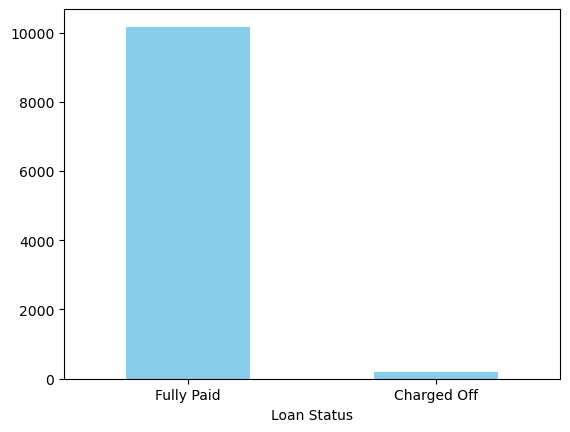

In [148]:
import matplotlib.pyplot as plt
X.value_counts().plot(kind='bar',color='skyblue')
plt.xticks(rotation=0)